In [14]:
!wget https://www.dropbox.com/s/veak3ugc4wj9luz/Alumni%20Giving%20Regression%20%28Edited%29.csv

--2023-11-16 10:20:43--  https://www.dropbox.com/s/veak3ugc4wj9luz/Alumni%20Giving%20Regression%20%28Edited%29.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/veak3ugc4wj9luz/Alumni%20Giving%20Regression%20%28Edited%29.csv [following]
--2023-11-16 10:20:43--  https://www.dropbox.com/s/raw/veak3ugc4wj9luz/Alumni%20Giving%20Regression%20%28Edited%29.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1bc1b7de1ebd21012c9b9d5bfb.dl.dropboxusercontent.com/cd/0/inline/CHoiXV_U8hMocHeKmrCJHgbH_QUtQJ5i2XUPdcIpPkFun5CqaSE6v4WDXRGmH-ibunyCkYZ0TzpLLmMc4d36Xw0-YfypH1mioRv4DucJFWA_DjVOmG8uLEwtTTiH8Gz4J0VxJUxyFqlO8brY0QBC-CvF/file# [following]
--2023-11-16 10:20:44--  https://uc1bc1b7de1ebd21012c9b9d5bfb.dl.dropboxusercontent.com/cd/0/in

In [15]:

from keras.models import Sequential

from keras.layers import Dense, Dropout

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

import numpy as np

from sklearn import linear_model

from sklearn import preprocessing

from sklearn import tree

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import pandas as pd

import csv

import matplotlib.pyplot as plt

In [45]:
np.random.seed(7)
df = pd.read_csv("Alumni Giving Regression (Edited) (1).csv", delimiter = ",")
dd_df_1 = df.head()

print(dd_df_1)

    A     B     C     D     E     F
0  24  0.42  0.16  0.59  0.81  0.08
1  19  0.49  0.04  0.37  0.69  0.11
2  18  0.24  0.17  0.66  0.87  0.31
3   8  0.74  0.00  0.81  0.88  0.11
4   8  0.95  0.00  0.86  0.92  0.28


In [24]:
dd_df_1.describe()

,A,B,C,D,E,F
count,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000
mean,15.400000,0.568000,0.074000,0.658000,0.83400,0.178000
std,7.127412,0.278873,0.084735,0.194602,0.08961,0.108028
min,8.000000,0.240000,0.000000,0.370000,0.69000,0.080000
25%,8.000000,0.420000,0.000000,0.590000,0.81000,0.110000
50%,18.000000,0.490000,0.040000,0.660000,0.87000,0.110000
75%,19.000000,0.740000,0.160000,0.810000,0.88000,0.280000
max,24.000000,0.950000,0.170000,0.860000,0.92000,0.310000


In [25]:
corr=df.corr(method ='pearson')
corr
print(corr)

          A         B         C         D         E         F
A  1.000000 -0.691900  0.414978 -0.604574 -0.521985 -0.549244
B -0.691900  1.000000 -0.581516  0.487248  0.376735  0.540427
C  0.414978 -0.581516  1.000000  0.017023  0.055766 -0.175102
D -0.604574  0.487248  0.017023  1.000000  0.934396  0.681660
E -0.521985  0.376735  0.055766  0.934396  1.000000  0.647625
F -0.549244  0.540427 -0.175102  0.681660  0.647625  1.000000


In [26]:

Y_POSITION = 5
model_1_features = [i for i in range(0,Y_POSITION)]
X = df.iloc[:,model_1_features]
Y = df.iloc[:,Y_POSITION]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=2020)

In [44]:
model1 = linear_model.LinearRegression()
model1.fit(X_train, y_train)
y_pred_train1 = model1.predict(X_train)
print("Regression")
print("================================")
RMSE_train1 = mean_squared_error(y_train,y_pred_train1)
print("Regression Train set: RMSE {} ".format(RMSE_train1))
print("================================")
y_pred1 = model1.predict(X_test)
RMSE_test1 = mean_squared_error(y_test, y_pred1)
print("Regression Test set: RMSE {}".format(RMSE_test1))
print("================================")

coef_dict = {}
for coef, feat in zip(model1.coef_, model_1_features):
    coef_dict[df.columns[feat]] = coef
print(coef_dict)

Regression
Regression Train set: RMSE 0.002761693322289229 
Regression Test set: RMSE 0.004209824026356377
{'A': -0.0009337757382416938, 'B': 0.16012156890162943, 'C': -0.044160015425349614, 'D': 0.15217907817100407, 'E': 0.17539950794101047}


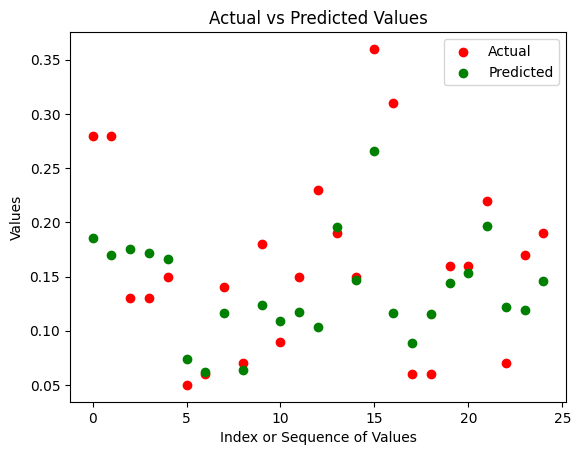

In [43]:
x_values = np.arange(len(y_test))

plt.scatter(x_values, y_test, color='red', label='Actual')

#Scatter plot of predicted values (y_pred) in green

plt.scatter(x_values, y_pred1, color='green', label='Predicted')

plt.xlabel('Index or Sequence of Values')

plt.ylabel('Values')

plt.title("Actual vs Predicted Values")

plt.legend()

plt.show()

In [42]:
model2 = tree. DecisionTreeRegressor()

model2.fit(X_train, y_train)

print("Decision Tree")

y_pred_train2 = model2.predict(X_train)

RMSE_train2 = mean_squared_error(y_train,y_pred_train2)

print("Decision Tree Train set: RMSE {}".format(RMSE_train2))

y_pred_test2 = model2.predict(X_test)

RMSE_test2 = mean_squared_error(y_test,y_pred_test2)
print("Decision Tree Test set: RMSE {}".format (RMSE_test2))
print("-------------------------")

Decision Tree
Decision Tree Train set: RMSE 1.4739259778473743e-36
Decision Tree Test set: RMSE 0.009052
-------------------------


Decision Tree Train set: RMSE 1.4739259778473743e-36


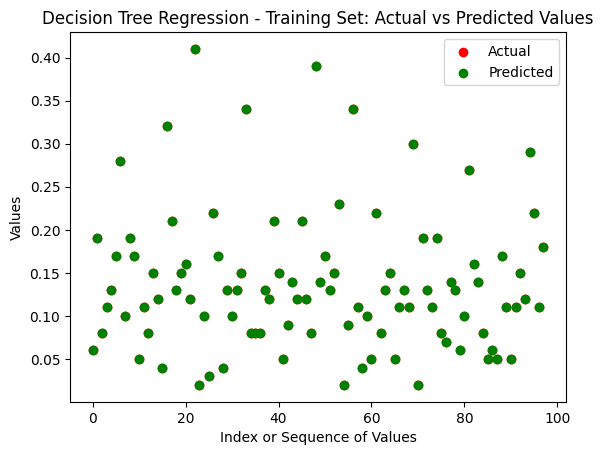

In [47]:
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

# Predictions on the training set
y_pred_train2 = model2.predict(X_train)

# Calculate RMSE for the training set
RMSE_train2 = mean_squared_error(y_train, y_pred_train2)
print("Decision Tree Train set: RMSE {}".format(RMSE_train2))

# Create a scatter plot for Actual vs Predicted values on the training set
x_values_train = np.arange(len(y_train))

plt.scatter(x_values_train, y_train, color='red', label='Actual')
plt.scatter(x_values_train, y_pred_train2, color='green', label='Predicted')

plt.xlabel('Index or Sequence of Values')
plt.ylabel('Values')
plt.title("Decision Tree Regression - Training Set: Actual vs Predicted Values")
plt.legend()
plt.show()

Decision Tree Test set: RMSE 0.009276000000000001


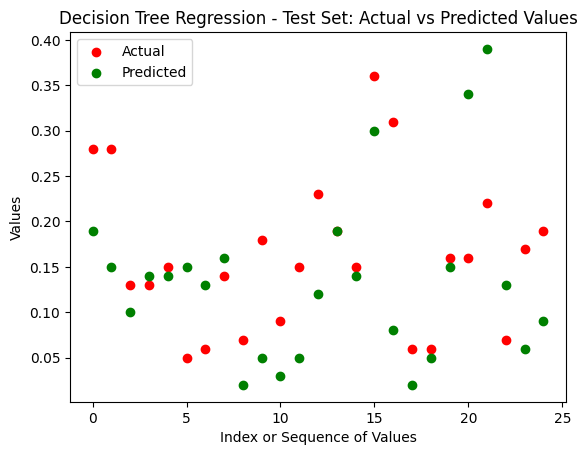

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assuming X_train, y_train, X_test, y_test are defined and imported

# Create and fit the Decision Tree Regressor model
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

# Predictions on the test set
y_pred_test2 = model2.predict(X_test)

# Calculate RMSE for the test set
RMSE_test2 = mean_squared_error(y_test, y_pred_test2)
print("Decision Tree Test set: RMSE {}".format(RMSE_test2))

# Create a scatter plot for Actual vs Predicted values on the test set
x_values_test = np.arange(len(y_test))

plt.scatter(x_values_test, y_test, color='red', label='Actual')
plt.scatter(x_values_test, y_pred_test2, color='green', label='Predicted')

plt.xlabel('Index or Sequence of Values')
plt.ylabel('Values')
plt.title("Decision Tree Regression - Test Set: Actual vs Predicted Values")
plt.legend()
plt.show()


In [52]:
model2 = tree. DecisionTreeRegressor()
model2.fit(X_train, y_train)
print("Decision Tree")

y_pred_train2 = model2.predict(X_train)

RMSE_train2 = mean_squared_error(y_train,y_pred_train2)
print("Decision Tree Train set: RMSE {}".format(RMSE_train2))

y_pred_test2 = model2.predict(X_test)
RMSE_test2 = mean_squared_error(y_test,y_pred_test2)
print("Decision Tree Test set: RMSE {}".format (RMSE_test2))
print("------------------")

Decision Tree
Decision Tree Train set: RMSE 1.4739259778473743e-36
Decision Tree Test set: RMSE 0.009052
------------------


Decision Tree Test set: RMSE 0.008612000000000002


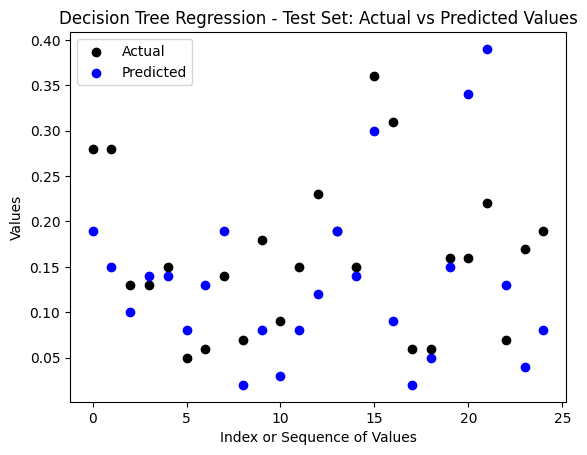

Decision Tree Test set: RMSE 0.008612000000000002
------------------


In [54]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error



# Predictions on the test set
y_pred_test2 = model2.predict(X_test)

# Calculate RMSE for the test set
RMSE_test2 = mean_squared_error(y_test, y_pred_test2)
print("Decision Tree Test set: RMSE {}".format(RMSE_test2))

# Create a scatter plot for Actual vs Predicted values on the test set
x_values_test = np.arange(len(y_test))

plt.scatter(x_values_test, y_test, color='black', label='Actual')
plt.scatter(x_values_test, y_pred_test2, color='blue', label='Predicted')

plt.xlabel('Index or Sequence of Values')
plt.ylabel('Values')
plt.title("Decision Tree Regression - Test Set: Actual vs Predicted Values")
plt.legend()
plt.show()

# Print additional information
print("Decision Tree Test set: RMSE {}".format(RMSE_test2))
print("------------------")
